In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import missingno as msno

In [2]:
#SELECT sql FROM sqlite_master WHERE type = 'view';

In [5]:
#file1 = '/Users/Павел/Documents/Курсовой проект/XLS/Table.csv'
file1 = '/Users/Administrator/Documents/GitHub/Data-Analyst-Project/XLS/Table.csv'
df = pd.read_csv(file1)
df

,Country,Year,Total_weight_kg,availability_of_metro,lines,stations,annual_ridership_mill,Population_eating_chocolate,GDP_USD,Inflation,kg_per_person,kg_per_GDP
0,Albania,1996,273411.0,No,NaN,NaN,NaN,1557925.0,985.82,"12,72547781",0.18,277.34
1,Albania,1997,222897.0,No,NaN,NaN,NaN,1550237.0,688.82,"33,18027438",0.14,323.59
2,Albania,1998,243309.0,No,NaN,NaN,NaN,1540864.0,795.88,"20,64285887",0.16,305.71
3,Albania,1999,420293.0,No,NaN,NaN,NaN,1530526.0,1010.37,"0,389437654",0.27,415.98
4,Albania,2000,303615.0,No,NaN,NaN,NaN,1519751.0,1101.52,"0,050018136",0.20,275.63
...,...,...,...,...,...,...,...,...,...,...,...,...
3165,Zimbabwe,2012,629857.0,No,NaN,NaN,NaN,4559903.0,1238.60,"3,725326661",0.14,508.52
3166,Zimbabwe,2013,556758.0,No,NaN,NaN,NaN,4624557.0,1362.30,"1,634950415",0.12,408.69
3167,Zimbabwe,2014,576602.0,No,NaN,NaN,NaN,4688428.0,1372.21,"-0,19778481",0.12,420.20
3168,Zimbabwe,2015,486762.0,No,NaN,NaN,NaN,4751674.0,1386.42,"-2,430968424",0.10,351.09


In [15]:
df.columns

Index(['Country', 'Year', 'Total_weight_kg', 'availability_of_metro', 'lines',
       'stations', 'annual_ridership_mill', 'Population_eating_chocolate',
       'GDP_USD', 'Inflation', 'kg_per_person', 'kg_per_GDP'],
      dtype='object')

unique_count = df.Year.nunique()
unique_count

In [13]:
# Проверка миссингов
df.isna().sum()

Country                           0
Year                              0
Total_weight_kg                   2
availability_of_metro             0
lines                          2323
stations                       2323
annual_ridership_mill          2323
Population_eating_chocolate     101
GDP_USD                          82
Inflation                       719
kg_per_person                   103
kg_per_GDP                       84
dtype: int64

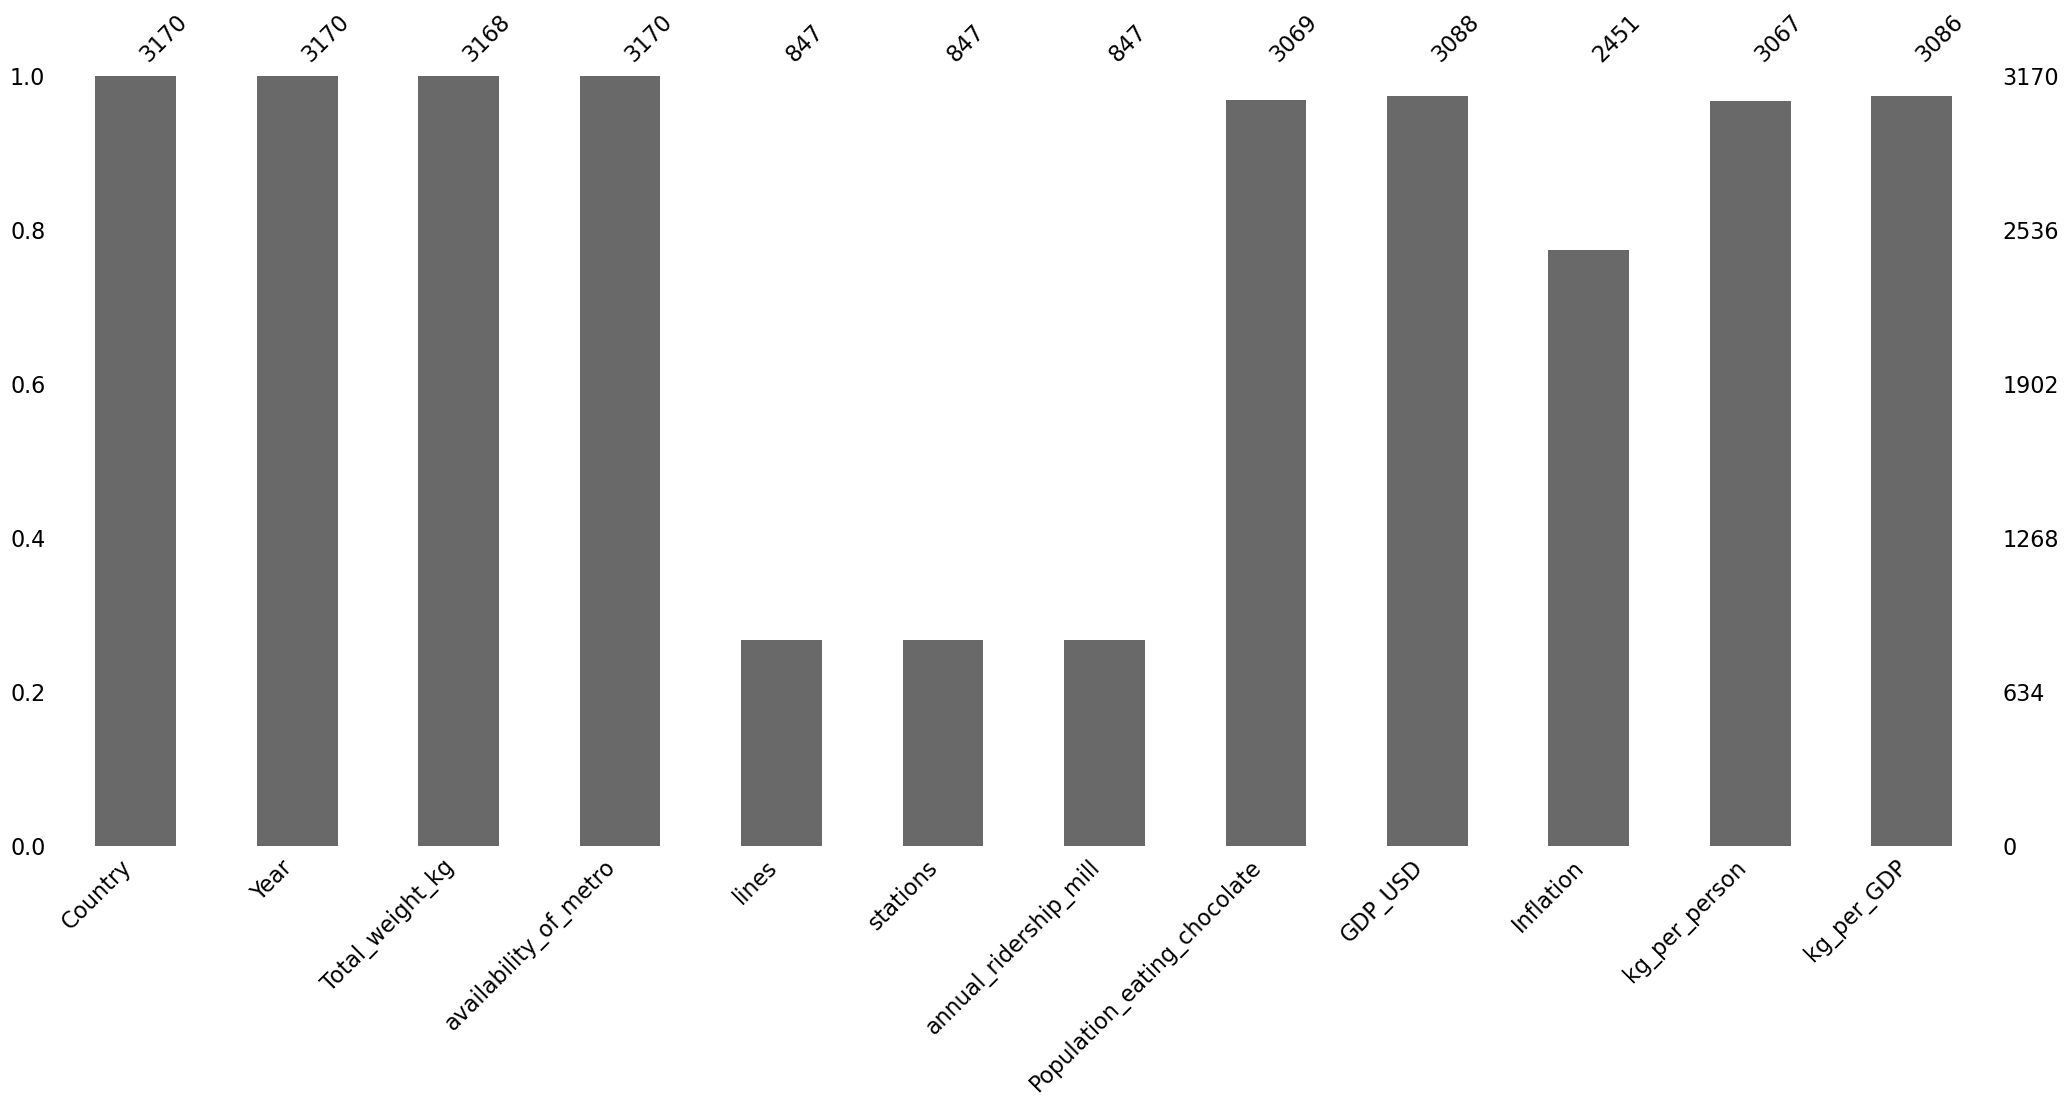

In [14]:
# Проверка миссингов
msno.bar(df);

In [ ]:
# При анализе корреляции обнаружилась умеренная положительная корреляция (0.537) между тестовыми оценками по math и read. Это может указывать на то, что учащиеся, которые хорошо справляются с математикой, хороши и в чтении.
df1=df[['math','read','antisoc','income']]
df1.corr().round(3)

# При анализе корреляции обнаружилась умеренная положительная корреляция (0.537) между тестовыми оценками по math и read. Это может указывать на то, что учащиеся, которые хорошо справляются с математикой, хороши и в чтении.

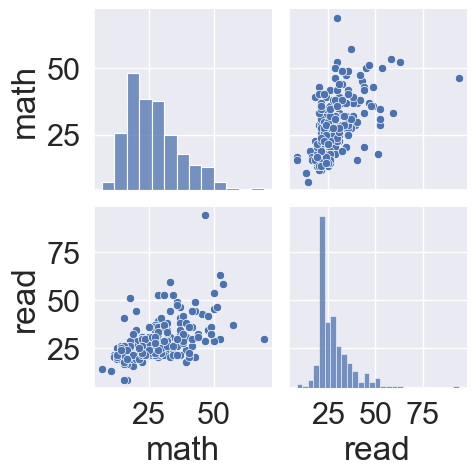

In [4]:
sns.set(style='ticks')
sns.set(font_scale=2)
sns.pairplot(df[['math','read']]);

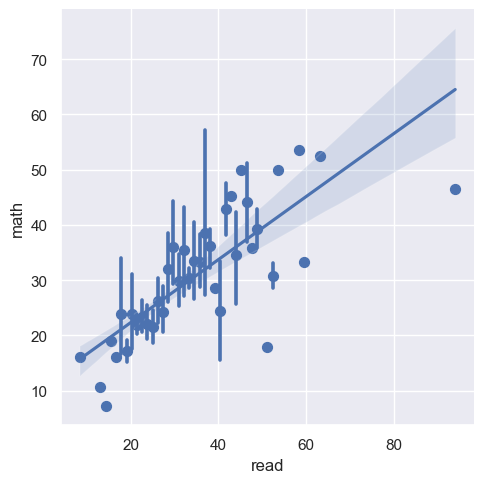

In [5]:
# Графическое изображение корреляции math и read
sns.set(font_scale=1)
sns.lmplot(x="read", y="math", data=df, x_estimator=np.mean);

In [6]:
# Проведение регрессионного анализа
df_ols = smf.ols(formula='math ~ antisoc  + income + read', data=df).fit()
df_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   math   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     40.47
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           3.46e-21
Time:                        11:44:48   Log-Likelihood:                -865.83
No. Observations:                 243   AIC:                             1740.
Df Residuals:                     239   BIC:                             1754.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.8169      1.855      4.213      0.000       4.162      11.472
antisoc        0.5390      0.385      1.400      0.163      -0.220       1.298
income         0.1108      0.027      4.077      0.000       0.057       0.164
read           0.5490      0.056      9.788      0.000       0.438       0.659
==============================================================================
Omnibus:                       30.947   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.159
Skew:                           0.806   Prob(JB):                     4.25e-10
Kurtosis:                       4.291   Cond. No.                         141.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Первичные выводы:
1. При R-squared = 0.337 - модель имеет умеренную предсказательную силу.
2. При F-statistic = 40.47 и Prob (F-statistic) = 3.46e-21 - модель в целом статистически значима. Предикторы income и read	имеют значительное влияние на зависимую переменную - math
3. При Skew = 0.806 - модель имеет положительную асимметрию остатков. Это подтверждается тестом на нормальность (Шапиро-Уилка), где p-value: 1.73e-08 < 0.05
4. При P(antisoc) = 0.163 - предиктор "antisoc" не имеет значительного влияния на зависимую переменную - math.
5. При Durbin-Watson = 1.943 приблизительно равно 2 - указывает на отсутствие автокорреляции.
6. При Omnibus = 30.947 и Jarque-Bera = 43.159 - тесты на нормальность остатков указывают на то, что остатки не распределены нормально.

In [7]:
shapiro_test = stats.shapiro(df['math'])
print(f'Shapiro-Wilk Test Statistic: {shapiro_test.statistic:.4f}')
print(f'p-value: {shapiro_test.pvalue:.10f}')

Shapiro-Wilk Test Statistic: 0.9393
p-value: 0.0000000173


Коэффициент асимметрии: 0.8895142551476454


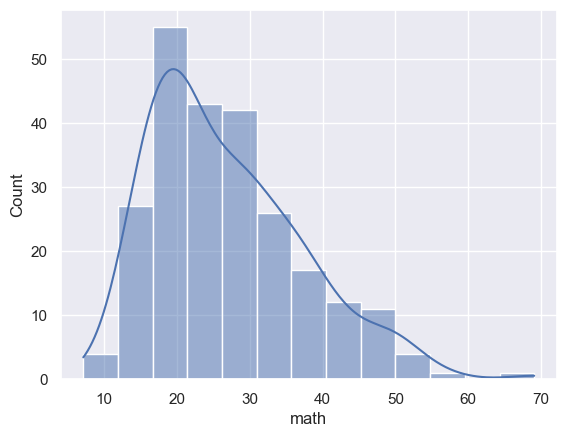

In [8]:
# Расчет коэффициента асимметрии
sns.histplot(data=df, x="math", kde=True)
skewness = df['math'].skew()
print(f'Коэффициент асимметрии: {skewness}')

In [9]:
# При проведении логарифмирования коэффициент асимметрии существенно не изменился, мультиколлинеарность увеличилась - т.е. метод не эффективен для данной модели
df_ols1 = smf.ols(formula='math ~ antisoc  + income + np.log(read)', data=df).fit()
df_ols1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   math   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     43.68
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           1.53e-22
Time:                        11:44:56   Log-Likelihood:                -862.63
No. Observations:                 243   AIC:                             1733.
Df Residuals:                     239   BIC:                             1747.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -36.1671      5.830     -6.204      0.000     -47.652     -24.682
antisoc          0.4537      0.380      1.193      0.234      -0.295       1.203
income           0.1034      0.027      3.846      0.000       0.050       0.156
np.log(read)    18.1859      1.777     10.234      0.000      14.685      21.687
==============================================================================
Omnibus:                       29.980   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.327
Skew:                           0.805   Prob(JB):                     1.75e-09
Kurtosis:                       4.179   Cond. No.                         374.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# Durbin-Watson = 1.943 приблизительно равно 2 - указывает на отсутствие автокорреляции. 
name = ["Durbin-Watson statistic"]
test = [sms.durbin_watson(df_ols.resid)]
lzip(name, test)

[('Durbin-Watson statistic', 1.9425224842269104)]

In [11]:
# Коэффициент инфляции дисперсии для всех предикторов находится в пределах 1.0-1.03 - указывает на отсутствие значительной мультиколлинеарности.
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
X = df_ols.model.exog
vif_data = pd.DataFrame()
vif_data["feature"] = df_ols.model.exog_names
vif_data["VIF"] = [VIF(X, i) for i in range(X.shape[1])]
print(vif_data)

     feature        VIF
0  Intercept  11.293256
1    antisoc   1.018248
2     income   1.026763
3       read   1.008450


In [12]:
# По итогу центрирования удалось уменьшить влияние мультиколлинеарности (Cond. No. 68 instead 141) 
df['logmath'] = np.log(df['math'])
df_centered = df.copy()
df_centered[['read', 'logmath']] = df[['read', 'logmath']] - df_centered[['read', 'logmath']].mean()
results2 = smf.ols("math ~ antisoc  + income + read", data=df_centered).fit() # data=dat_centered
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                   math   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     40.47
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           3.46e-21
Time:                        11:45:04   Log-Likelihood:                -865.83
No. Observations:                 243   AIC:                             1740.
Df Residuals:                     239   BIC:                             1754.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.1419      1.100     21.042      0.0

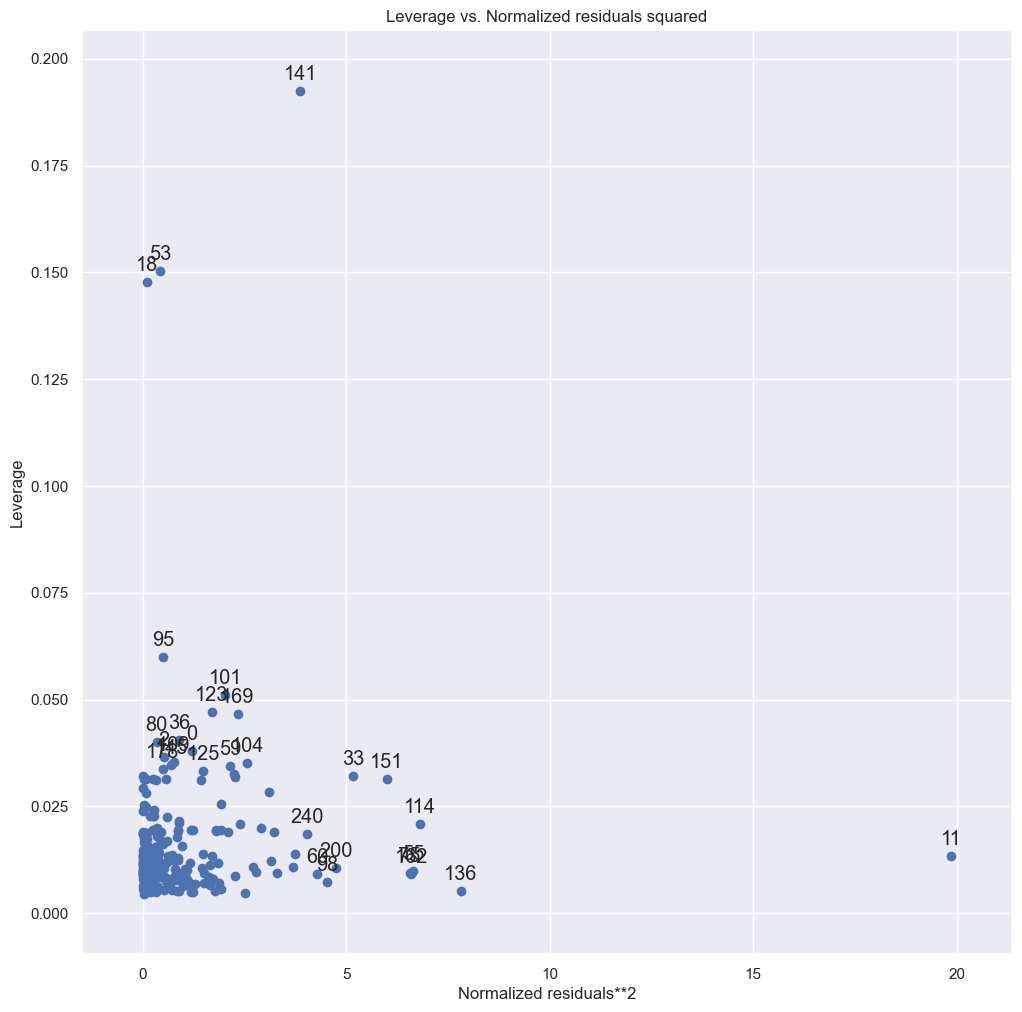

In [13]:
# На графике, показывающий влияние наблюдений на модель регрессии видно что наблюдения №11,18,53,141 являются аномальными.
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(12, 12))
fig = plot_leverage_resid2(df_ols, ax=ax)
fig;

In [14]:
# Результаты теста Бреуша-Пагана указывают на наличие гетероскедастичности в модели (при p-value = 0.022 < 0.05)
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(df_ols.resid, df_ols.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 9.541308091727952),
 ('p-value', 0.022895947978503015),
 ('f-value', 3.25592594173499),
 ('f p-value', 0.022358427685870798)]

In [15]:
# Учитывая наличие гетероскедастичности применим робастную линейную модель
# В результате значение std err для read уменьшилось (0.049 instead 0.056)
df['logmath'] = np.log(df['math'])
res = sm.RLM(df['math'], df[['read','logmath']]).fit()
print(res.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                   math   No. Observations:                  243
Model:                            RLM   Df Residuals:                      241
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 24 Mar 2025                                         
Time:                        11:45:13                                         
No. Iterations:                    20                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
read           0.2159      0.049      4.398      0.0

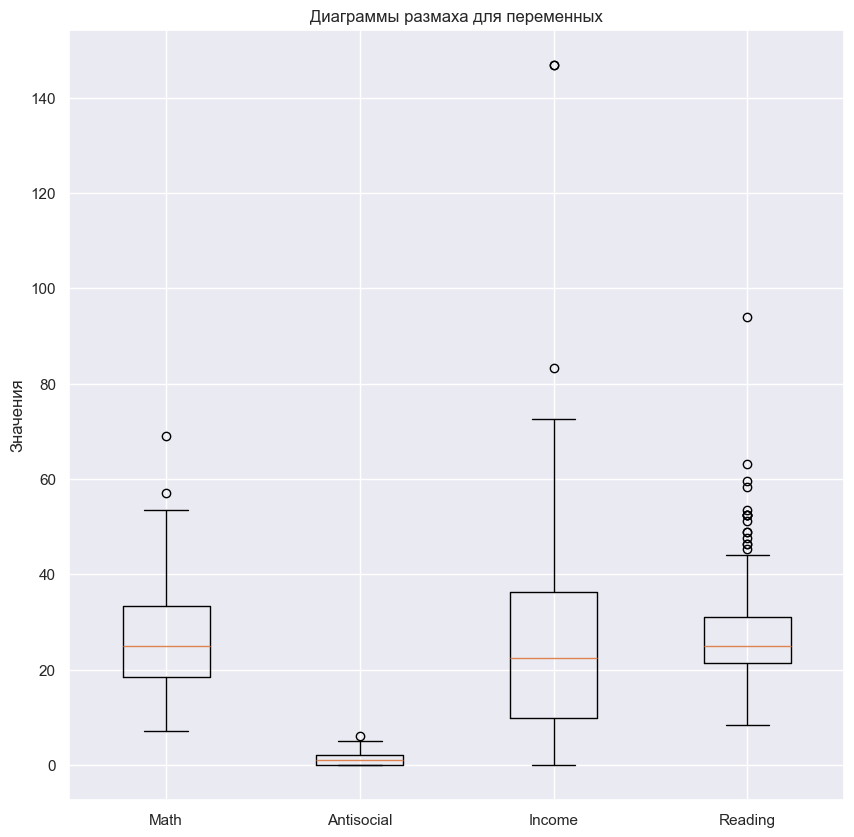

In [17]:
# При построении диаграммы размаха для переменных видно аномальное значение в income. Это указывает на значительный доход у одного из отцов и влияет на более широкий диапазон "коробок" на диаграмме.
plt.figure(figsize=(10, 10))
plt.boxplot([df['math'], df['antisoc'], df['income'], df['read']], 
            tick_labels=['Math', 'Antisocial', 'Income', 'Reading'])
plt.title('Диаграммы размаха для переменных')
plt.ylabel('Значения')
plt.grid(True)
plt.show()

# Итоговый вывод:
1. Предикторы income и read имеют значительное положительное влияние на math (p=0), в то время как влияние antisoc не является статистически значимым (p=0.163).